**Mall Customers Segmentation using KMeans**

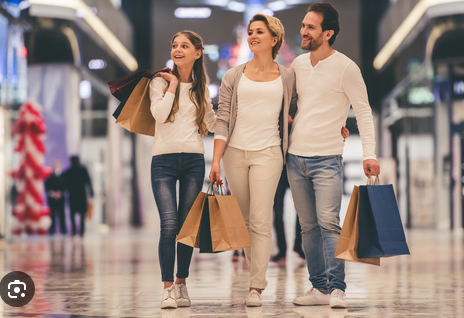

**About The Dataset**

KMeans Clustering is widely used method for cluster Analysis where the aim is to partition a set of objects into K-clusters in such a way that sum of the squared distance between the objects and their assigned cluster mean is minimized.

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

In [ ]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading Dataset
df=pd.read_csv('/content/Mall_Customers.csv')
df

NameError: ignored

***Data Preprocessing.***

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [ ]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.corr()

<ipython-input-62-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
# Encoding Gender[labelencoding]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

NameError: ignored

In [ ]:
x=df.drop(['CustomerID'],axis=1)
x
#also x=df.iloc[:,2:5]

NameError: ignored

In [ ]:
# Finding number of clusters
from sklearn.cluster import KMeans
cl=[]
for i in range(1,11):  # i acts as cluster
    model=KMeans(n_clusters=i,init='k-means++',random_state=42)
    model.fit(x)             # contain only input
    cl.append(model.inertia_)   # i value ==>1-10  calculating variance ==> variance is appending to empty list

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
print(cl)    # gets variance for curresponding i

[308862.06000000006, 212889.44245524303, 143391.59236035676, 104414.67534220168, 75427.71182424155, 58348.641363315044, 51575.2779310779, 44359.634641148325, 40942.51117006117, 37515.84125504126]


Text(0.5, 0.98, 'Variance Vs Number of Clusters')

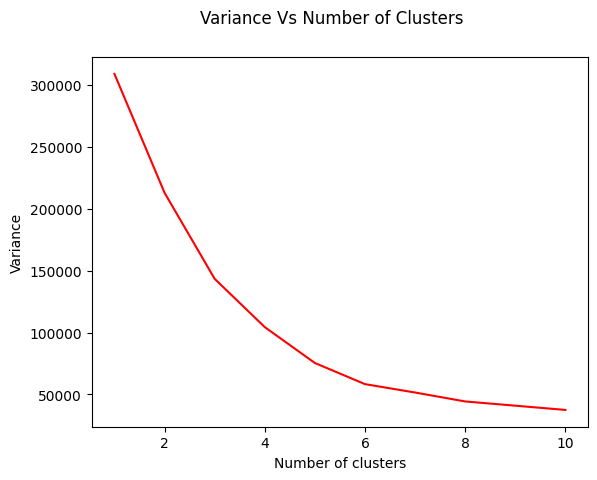

In [ ]:
# plotting graph based on variance and number of clusters, we understand the elbow point
plt.plot(range(1,11),cl,color='red')
plt.xlabel("Number of clusters")
plt.ylabel("Variance")
plt.suptitle("Variance Vs Number of Clusters")

In [ ]:
# considering elbow point  as 6

In [ ]:
# Model Creation
model1=KMeans(n_clusters=6,init='k-means++',random_state=42)
model1.fit(x)
y_means=model1.predict(x)
y_means    # What we get is output ==>combine input and output

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 4,
       5, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [ ]:
# combining into single dataframe
x['Cluster']=y_means
x

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,0
196,0,45,126,28,3
197,1,32,126,74,0
198,1,32,137,18,3


In [ ]:
# Applying supervised machine learning
x1=x.iloc[:,:-1].values
y1=x.iloc[:,-1].values
y1

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 1, 2, 1, 4,
       5, 2, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 3, 0,
       4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [ ]:
# Training and Testing Data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=42)

In [ ]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
model.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Model Creation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

array([4, 2, 5, 3, 3, 4, 4, 3, 3, 2, 1, 3, 0, 4, 3, 0, 1, 3, 1, 4, 4, 5,
       4, 4, 4, 1, 4, 1, 0, 4, 2, 5, 1, 4, 3, 1, 0, 0, 3, 1, 1, 0, 5, 5,
       0, 0, 2, 2, 0, 1, 4, 0, 2, 1, 1, 1, 3, 1, 3, 1], dtype=int32)

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,y_pred)
score

0.95

In [ ]:
# Classification Report
rep=classification_report(y_test,y_pred)
print(rep)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         6
           3       1.00      0.85      0.92        13
           4       0.92      0.92      0.92        13
           5       1.00      1.00      1.00         5

    accuracy                           0.95        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.95      0.95      0.95        60

